# Uses batting angle distances to illustrate polynomial regression

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score

df = pd.read_csv('./data/batting-angles-distances.csv')
df.head()

,Angle,Distance
0,34,253.934210
1,33,270.378070
2,70,158.648806
3,54,234.594933
4,26,250.652104


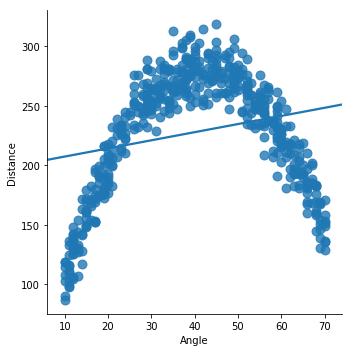

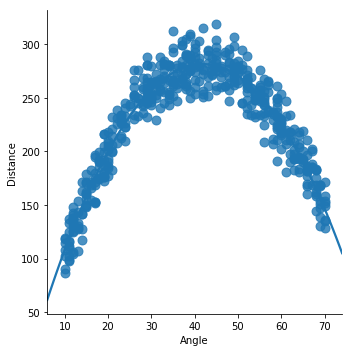

In [8]:
#looking at linear vs quadratic fit (using seaborn)
pt = sns.lmplot(x='Angle', y='Distance', data=df, order=1,ci=None,scatter_kws={'s':80}) #Linear
pt2 = sns.lmplot(x='Angle', y='Distance', data=df, order=2,ci=None,scatter_kws={'s':80}) #Quadratic 
plt.show()

In [10]:
# get the raw x data
data_x = df[['Angle']]

# create a quadratic variable preprocessor
quad = PolynomialFeatures(degree=2)

# fit and transform the data
data_x_2 = quad.fit_transform(data_x)

# get the target vector
data_y = df['Distance']

### Evaluate the linear model

In [13]:
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2, random_state=4)

#create, fit and evaluate model
linear_mod = linear_model.LinearRegression()
linear_mod.fit(x_train, y_train)
preds = linear_mod.predict(x_test)

#look at actual vs predicted values:
print('MSE, MAE, R^2, EVS: ' +str([mean_squared_error(y_test, preds),
                                  median_absolute_error(y_test, preds),
                                  r2_score(y_test, preds),
                                   explained_variance_score(y_test, preds)]))

MSE, MAE, R^2, EVS: [3233.8398057597906, 43.785030483449844, 0.005364757505538886, 0.08447669465740837]


### Evaluate Quadratic Model

In [14]:
x_train, x_test, y_train, y_test = train_test_split(data_x_2, data_y, test_size=0.2, random_state=4)

#create, fit and evaluate model
linear_mod = linear_model.LinearRegression()
linear_mod.fit(x_train, y_train)
preds = linear_mod.predict(x_test)

#look at actual vs predicted values:
print('MSE, MAE, R^2, EVS: ' +str([mean_squared_error(y_test, preds),
                                  median_absolute_error(y_test, preds),
                                  r2_score(y_test, preds),
                                   explained_variance_score(y_test, preds)]))

MSE, MAE, R^2, EVS: [226.82140855446963, 10.04539228545903, 0.9302363195917479, 0.9307178636004925]
